# Clustering

In [155]:
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import numpy as np
import scipy.cluster.hierarchy as hier
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn import cluster, datasets, mixture
import sklearn_extra
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from mpl_toolkits.mplot3d import Axes3D
import scipy.cluster.hierarchy as shc
from sklearn.cluster import MiniBatchKMeans
import warnings
warnings.filterwarnings('ignore')

np.random.seed = 23

In [197]:
df = pd.read_csv('data/x_train.csv')

In [119]:
df.describe()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
count,22152.000000,22152.000000,22152.000000,22152.000000,22152.000000,22152.000000,22152.000000,22152.000000,22152.000000,22152.000000,...,22152.000000,22152.000000,22152.000000,22152.000000,22152.000000,22152.000000,22152.000000,22152.000000,22152.000000,22152.000000
mean,0.297385,0.017831,0.105766,0.556022,0.160347,0.492494,0.467350,0.159173,0.083092,0.096453,...,0.283631,0.151950,0.513678,0.294962,0.039410,0.649196,0.064103,0.105273,0.040132,0.033676
std,0.138661,0.132341,0.108254,0.496863,0.366936,0.277320,0.217746,0.149147,0.127125,0.236212,...,0.450770,0.358981,0.499824,0.456036,0.194572,0.477232,0.244941,0.306911,0.196273,0.180399
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.194805,0.000000,0.047909,0.000000,0.000000,0.233333,0.363636,0.063033,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.272727,0.000000,0.066568,1.000000,0.000000,0.500000,0.454545,0.112278,0.050000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.389610,0.000000,0.113536,1.000000,0.000000,0.666667,0.636364,0.202232,0.100000,0.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Wizualizacja przy pomocy PCA

In [120]:
pca = PCA(n_components=3)
pca.fit(df)
PCA_ds = pd.DataFrame(pca.transform(df), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,22152.0,2.373608e-17,0.705392,-1.100283,-0.570920,-0.224552,0.667075,1.562608
col2,22152.0,-1.700016e-17,0.644601,-1.012303,-0.605372,-0.117278,0.546055,1.264967
col3,22152.0,-4.971746e-18,0.542401,-1.180255,-0.428364,-0.021275,0.411938,1.666144


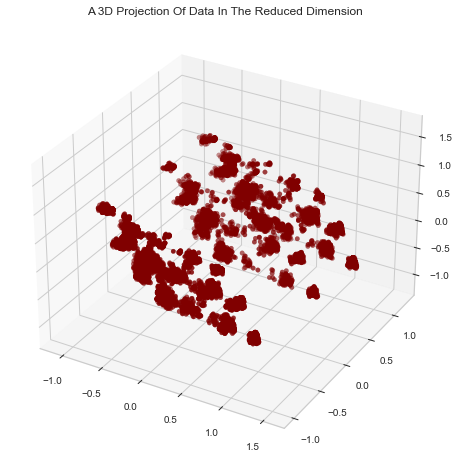

In [121]:
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

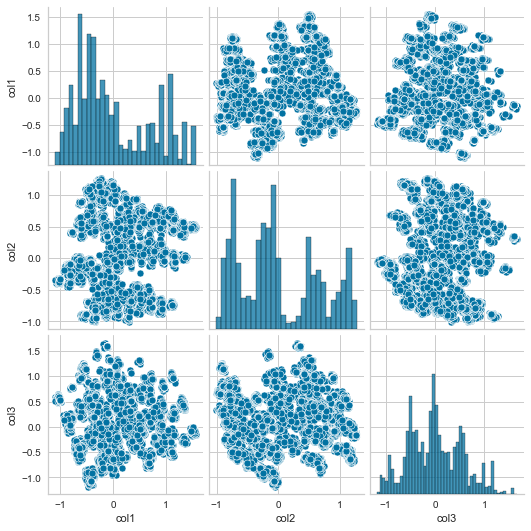

In [122]:
# wykresy zmiennych
sns.pairplot(PCA_ds)


## Poszukiwanie optymalnej liczby klastrów

In [123]:
def count_clustering_scores(X, cluster_num, model, score_fun):
   
    if isinstance(cluster_num, int):
        cluster_num_iter = [cluster_num]
    else:
        cluster_num_iter = cluster_num
        
    scores = []    
    for k in cluster_num_iter:
        model_instance = model(n_clusters=k)
        labels = model_instance.fit_predict(X)
        wcss = score_fun(X, labels)
        scores.append(wcss)
    
    if isinstance(cluster_num, int):
        return scores[0]
    else:
        return scores

### Kmeans

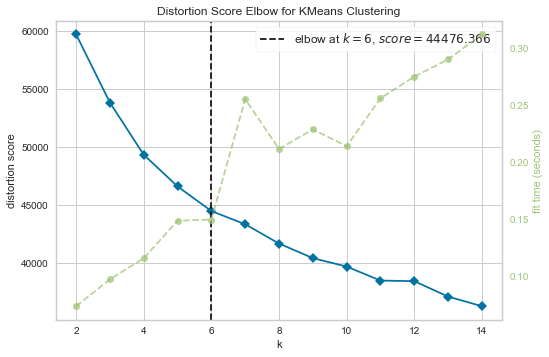

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [124]:
Elbow_M = KElbowVisualizer(KMeans(), k=(2,15))
Elbow_M.fit(df)
Elbow_M.show()

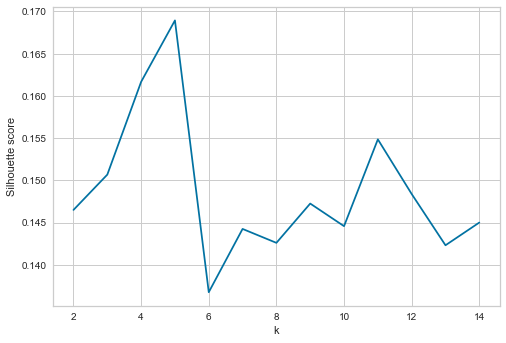

In [125]:
cluster_num_seq = range(2, 15)
silhouette_vec = count_clustering_scores(df, cluster_num_seq, KMeans, silhouette_score)
plt.plot(cluster_num_seq, silhouette_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()

Łokieć wskazuje na 6 klastrów, a silhouette_score na 5

### Kmedoids

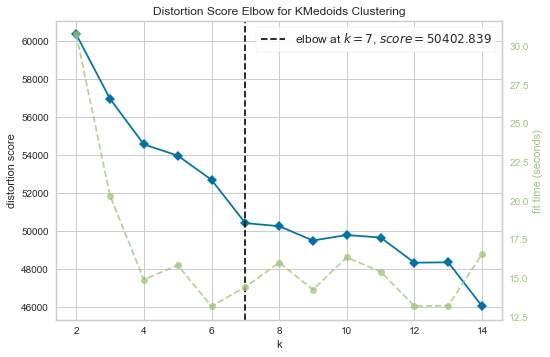

<AxesSubplot:title={'center':'Distortion Score Elbow for KMedoids Clustering'}, xlabel='k', ylabel='distortion score'>

In [126]:
Elbow_Medoids = KElbowVisualizer(KMedoids(), k=(2,15))
Elbow_Medoids.fit(df)
Elbow_Medoids.show()

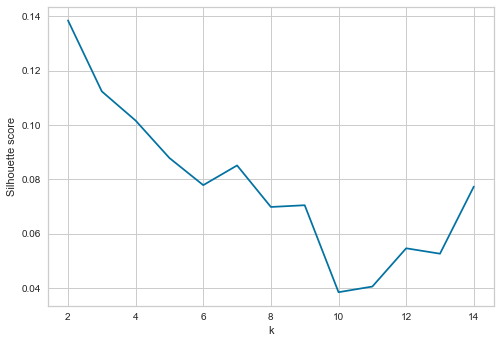

In [127]:
cluster_num_seq = range(2, 15)
silhouette_vec = count_clustering_scores(df, cluster_num_seq, KMedoids, silhouette_score)
plt.plot(cluster_num_seq, silhouette_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()

Łokieć wskazuje na 7 klastrów, a silhouette_score na 2

### Gap statistic

In [128]:
def optimalK(data, nrefs=3, maxClusters=15):

    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):
        refDisps = np.zeros(nrefs)
        for i in range(nrefs):
            
            randomReference = np.random.random_sample(size=data.shape)
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp
        km = KMeans(k)
        km.fit(data)
        origDisp = km.inertia_
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
    return (gaps.argmax() + 1, resultsdf)  

Optimal k is:  14


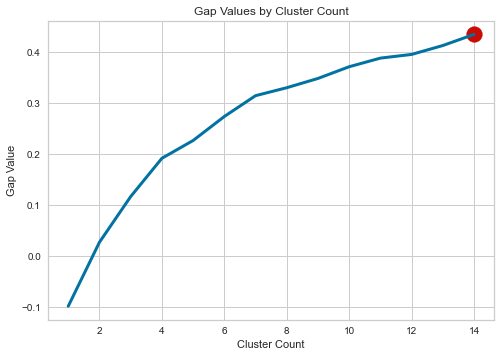

In [129]:
k, gapdf = optimalK(df, nrefs=3, maxClusters=15)
print('Optimal k is: ', k)
plt.plot(gapdf.clusterCount, gapdf.gap, linewidth=3)
plt.scatter(gapdf[gapdf.clusterCount == k].clusterCount, gapdf[gapdf.clusterCount == k].gap, s=250, c='r')
plt.grid(True)
plt.xlabel('Cluster Count')
plt.ylabel('Gap Value')
plt.title('Gap Values by Cluster Count')
plt.show()

### Dendogram 

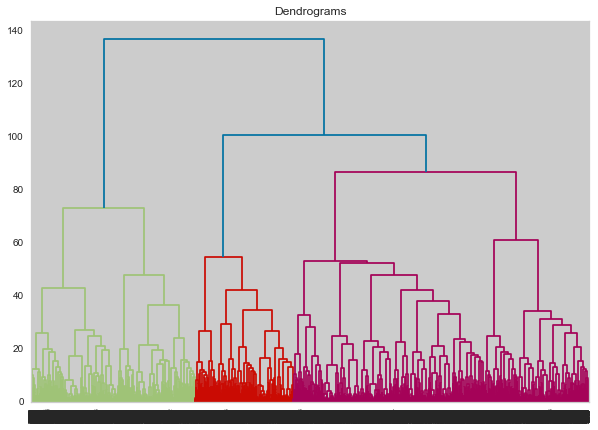

In [130]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df, method='ward'))

### AgglomerativeClustering

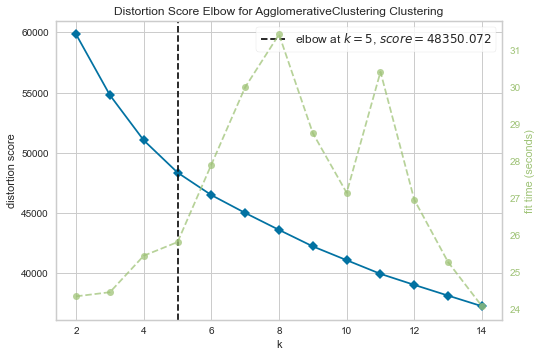

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [132]:
Elbow_Medoids = KElbowVisualizer(AgglomerativeClustering(), k=(2,15))
Elbow_Medoids.fit(df)
Elbow_Medoids.show()

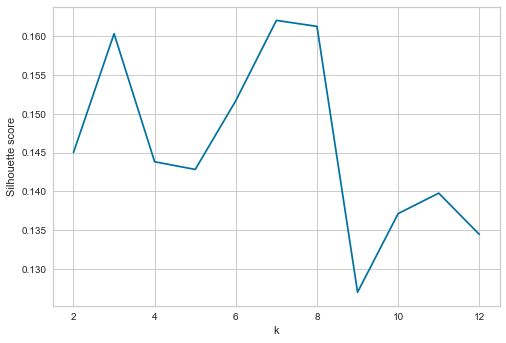

In [131]:
cluster_num_seq = range(2, 13)
silhouette_vec = count_clustering_scores(df, cluster_num_seq, AgglomerativeClustering, silhouette_score)
plt.plot(cluster_num_seq, silhouette_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()

silhouette_score wskazuje na 7, a łokieć na 5

### AIC And BIC From GMMs

In [133]:
aic_score = {} 
bic_score = {}

for i in range(1,15): 
  gmm = GaussianMixture(n_components=i, random_state=0).fit(df)
  aic_score[i] = gmm.aic(df)
  bic_score[i] = gmm.bic(df)

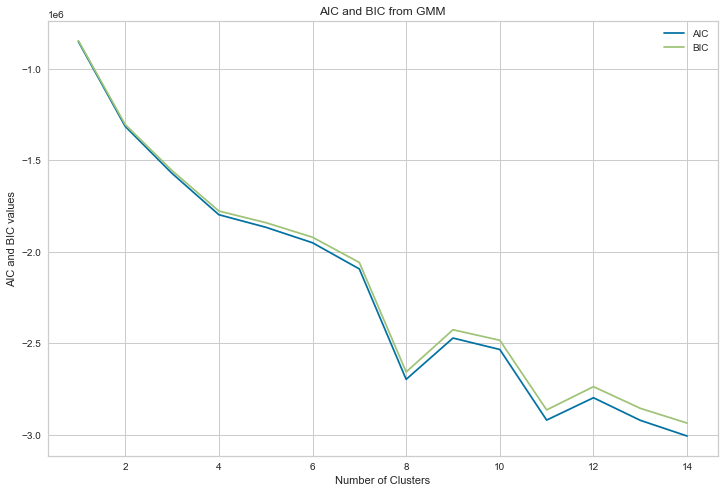

In [134]:
plt.figure(figsize=(12,8))
plt.plot(list(aic_score.keys()),list(aic_score.values()), label='AIC')
plt.plot(list(bic_score.keys()),list(bic_score.values()), label='BIC')
plt.legend(loc='best')
plt.title('AIC and BIC from GMM')
plt.xlabel('Number of Clusters')
plt.ylabel('AIC and BIC values')
plt.show()

14 klastrów, ale 8 11 też okej

In [148]:
results = [6,5,7,7,5]
median = np.median(results)
median

6.0

# Clusterization

### 1. Kmeans

In [149]:
k = 6  # Wybierz liczbę klastrów
kmeans = KMeans(n_clusters=k)
kmeans.fit(df)
labels = kmeans.labels_

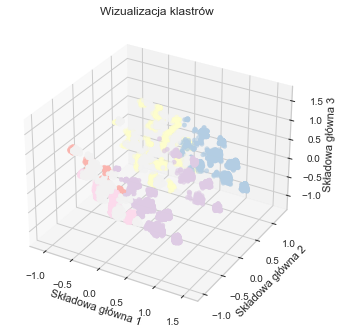

In [150]:
pca = PCA(n_components=3)  # Wybierz liczbę składowych głównych
X_pca = pca.fit_transform(df)
labels = kmeans.labels_

# Wygeneruj wykres punktowy dla klastrów w 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap='Pastel1')
ax.set_title("Wizualizacja klastrów")
ax.set_xlabel("Składowa główna 1")
ax.set_ylabel("Składowa główna 2")
ax.set_zlabel("Składowa główna 3")
plt.show()

In [151]:
for cluster in range(k):
    cluster_elements = df[labels == cluster]
    cluster_medians = np.median(cluster_elements, axis=0)
    print(f'Klaster {cluster+1}:')
    for column, median in enumerate(cluster_medians):
        column_name = df.columns[column]
        print(f'{column_name}: {median}')
    print('---')

Klaster 1:
age: 0.2727272727272727
default: 0.0
balance: 0.0658747834694382
housing: 1.0
loan: 0.0
day: 0.5
month: 0.3636363636363636
duration: 0.1122783978988837
campaign: 0.05
pdays: 0.0
job_admin.: 0.0
job_blue-collar: 0.0
job_entrepreneur: 0.0
job_housemaid: 0.0
job_management: 0.0
job_retired: 0.0
job_self-employed: 0.0
job_services: 0.0
job_student: 0.0
job_technician: 0.0
job_unemployed: 0.0
job_unknown: 0.0
marital_divorced: 0.0
marital_married: 1.0
marital_single: 0.0
education_primary: 0.0
education_secondary: 1.0
education_tertiary: 0.0
education_unknown: 0.0
contact_cellular: 1.0
contact_telephone: 0.0
poutcome_failure: 0.0
poutcome_other: 0.0
poutcome_success: 0.0
---
Klaster 2:
age: 0.1818181818181818
default: 0.0
balance: 0.073645137342242
housing: 0.0
loan: 0.0
day: 0.5
month: 0.4545454545454545
duration: 0.1181877872619829
campaign: 0.05
pdays: 0.0
job_admin.: 0.0
job_blue-collar: 0.0
job_entrepreneur: 0.0
job_housemaid: 0.0
job_management: 1.0
job_retired: 0.0
job_sel

### 2. MiniBatchKMeans

In [158]:
miniBatchKmeans = MiniBatchKMeans(n_clusters= 6)
miniBatchKmeans.fit(df)

MiniBatchKMeans(n_clusters=6)

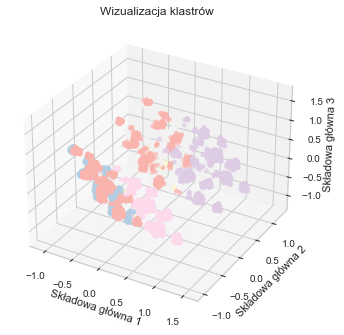

In [159]:
pca = PCA(n_components=3)  # Wybierz liczbę składowych głównych
X_pca = pca.fit_transform(df)
labels = miniBatchKmeans.labels_

# Wygeneruj wykres punktowy dla klastrów w 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap='Pastel1')
ax.set_title("Wizualizacja klastrów")
ax.set_xlabel("Składowa główna 1")
ax.set_ylabel("Składowa główna 2")
ax.set_zlabel("Składowa główna 3")
plt.show()

### 3. Agglomerative Clustering

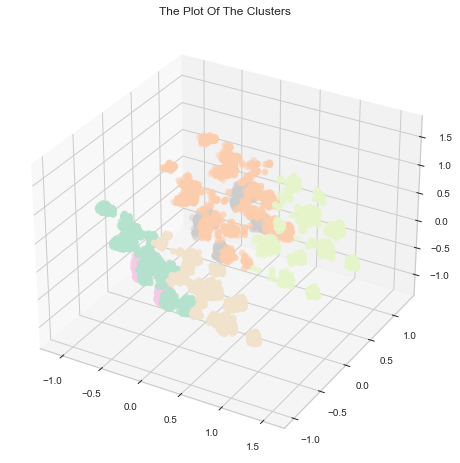

In [196]:
AC = AgglomerativeClustering(6)
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC


fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap='Pastel2' )
ax.set_title("The Plot Of The Clusters")
plt.show()

In [198]:
AC = AgglomerativeClustering(6)
AC.fit(df)
labels = AC.labels_
for cluster in range(k):
    cluster_elements = df[labels == cluster]
    cluster_medians = np.median(cluster_elements, axis=0)
    print(f'Klaster {cluster+1}:')
    for column, median in enumerate(cluster_medians):
        column_name = df.columns[column]
        print(f'{column_name}: {median}')
    print('---')

Klaster 1:
age: 0.3376623376623376
default: 0.0
balance: 0.0648354367730759
housing: 1.0
loan: 0.0
day: 0.4666666666666667
month: 0.4545454545454545
duration: 0.1096520026263952
campaign: 0.05
pdays: 0.0
job_admin.: 0.0
job_blue-collar: 1.0
job_entrepreneur: 0.0
job_housemaid: 0.0
job_management: 0.0
job_retired: 0.0
job_self-employed: 0.0
job_services: 0.0
job_student: 0.0
job_technician: 0.0
job_unemployed: 0.0
job_unknown: 0.0
marital_divorced: 0.0
marital_married: 1.0
marital_single: 0.0
education_primary: 1.0
education_secondary: 0.0
education_tertiary: 0.0
education_unknown: 0.0
contact_cellular: 1.0
contact_telephone: 0.0
poutcome_failure: 0.0
poutcome_other: 0.0
poutcome_success: 0.0
---
Klaster 2:
age: 0.2987012987012987
default: 0.0
balance: 0.0665676812670131
housing: 1.0
loan: 0.0
day: 0.5
month: 0.4545454545454545
duration: 0.1122783978988837
campaign: 0.05
pdays: 0.0
job_admin.: 0.0
job_blue-collar: 0.0
job_entrepreneur: 0.0
job_housemaid: 0.0
job_management: 0.0
job_reti

### 4. DBSCAN

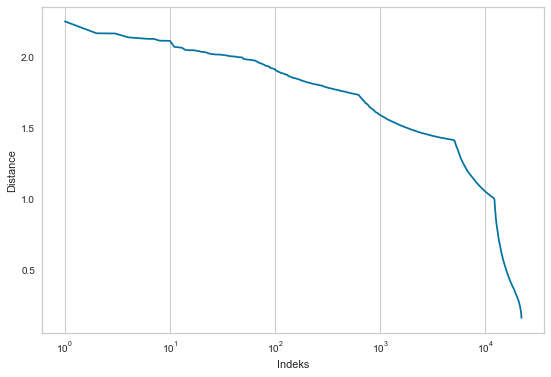

In [161]:
minPts = 68
nbrs = sklearn.neighbors.NearestNeighbors(n_neighbors=minPts).fit(df)
distances, indices = nbrs.kneighbors(df)
distanceDec = sorted(distances[:,minPts-1], reverse=True)
fig = plt.figure(figsize=(9,6))
ax1 = fig.add_subplot(111)

plt.xlabel('Indeks')
plt.ylabel('Distance')
ax1.plot(list(range(1,df.shape[0]+1)), distanceDec)

plt.xscale('log')
plt.grid(axis='y')

plt.show()

In [188]:
dbs = cluster.DBSCAN(eps=0.33, min_samples= minPts)
dbs.fit(X_pca)

DBSCAN(eps=0.33, min_samples=68)

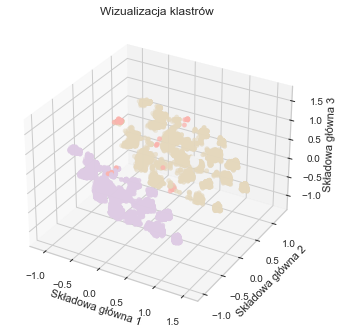

In [189]:
pca = PCA(n_components=3)  # Wybierz liczbę składowych głównych
X_pca = pca.fit_transform(df)
labels = dbs.labels_

# Wygeneruj wykres punktowy dla klastrów w 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap='Pastel1')
ax.set_title("Wizualizacja klastrów")
ax.set_xlabel("Składowa główna 1")
ax.set_ylabel("Składowa główna 2")
ax.set_zlabel("Składowa główna 3")
plt.show()